In [2]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

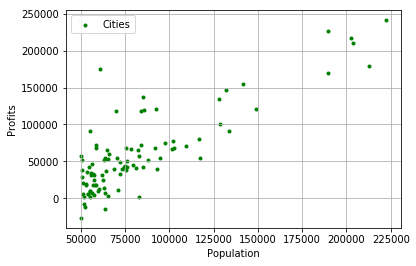

In [3]:
# Importing dataset
profits = np.loadtxt("datasets/profits.txt", delimiter=',', usecols=None)

# Ploting datapoints
plt.figure(1)
plt.scatter(profits[:,0]*10000, profits[:,1]*10000, marker='.', color='g', label='Cities')
plt.xlabel('Population')
plt.ylabel('Profits')
plt.legend()
plt.grid(True)

In [4]:
# Defining important variables
m = profits.shape[0]
y = np.matrix(profits[:,1]).T
alpha = 0.01
iterations = 1500

# Initializing cost_development to track progress
cost_development = np.zeros((iterations, 1))

# Getting Datapoints for house sizes
dp = np.matrix(profits[:,0]).T

# Inserting column of 1 at beginning of matrix as x0 values
X = np.insert(dp, 0, 1, axis = 1)

# Initializing Theta as all zeros
Theta = np.zeros((1,2))

In [5]:
# Cost Function
def cost(m, X, y, Theta):
    
    # Calculating hypothesis h
    h = X * Theta.T
    
    # Calculating cost J
    J = 1/(2*m) * np.square(h - y).sum()
    return J

cost(m, X, y, Theta)

32.072733877455676

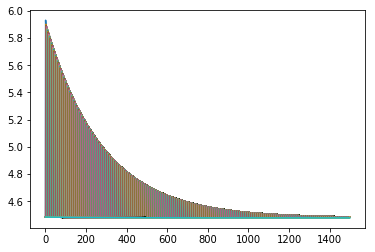

In [10]:
# Gradient descent
def grad(m, X, y, alpha, iterations, Theta):
    for i in range(1500):
        # Calculating cost
        h = (X * Theta.T - y).T*X
        
        # Calculating parameters Theta
        Theta = Theta - 1/m * np.multiply(alpha, h)
        
        # Plotting cost
        cost_development[i] = [cost(m, X, y, Theta)]
        plt.figure(2)
        plt.plot(cost_development)
    return Theta

Theta = grad(m, X, y, alpha, iterations, Theta)

In [11]:
# Some test predictions
predict1 = [1, 3.5] * Theta.T * 10000
predict2 = [1, 7] * Theta.T * 10000

print('Prediction 1: ', predict1[0,0], '\nPrediction 2: ', predict2[0,0])

Prediction 1:  2913.325861011238 
Prediction 2:  44607.16347252418


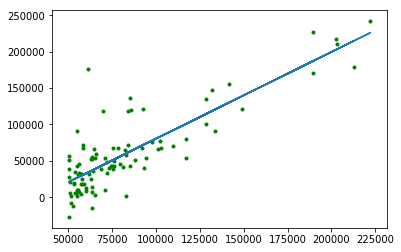

In [12]:
# Plotting datapoints and prediction function
plt.figure(3)
plt.plot(profits[:,0]*10000, X*Theta.T*10000)
plt.scatter(profits[:,0]*10000, profits[:,1]*10000, marker='.', color='g')